 # 📌ACTIVIDAD 3: RECONOCIMIENTO DE CARAS.

Crea el notebook saa-u03-p02-a3-<tus_iniciales>.ipynb donde completar la actividad. Vamos a
usar el dataset faces.images que tiene 400 imágenes de caras, que pertenecen a 40 personas diferentes
que aparece cada uno en 10 imágenes. Cada imagen está compuesta por una matriz de 64x64 pixeles.
La clave faces.data tiene la misma cantidad de datos pero en filas de 4096 características en lugar de
usar una estructura de tipo matriz (4096 = 64x64).

 a) Examinamos los datos para comprobar si tenemos que escalar los datos o no, por ejemplo.
Completa las sentencias que calculan los siguientes datos:

 b) Creamos un método para ver cierta cantidad de fotos usando matplotlib. Pasamos el array
de imágenes, el array que contiene los valores del target y los índices desde y hasta que
seleccionan el rango de imágenes a mostrar. En cada imagen aparece el target en rojo y el
índice de la foto en verde.

 c) Vas a utilizar un clasificador  SVC de nombre svc_1. Las nuevas instancias serán clasificadas
como pertenecientes a una determinada categoría en función de que lado del hiperplano
entran. Vamos a importar la clase SVC desde el módulo sklearn.svm y vas a indicar que va a
usar un kernel de tipo "linear".

 d) Divide en train y test los datos siento X=faces.data e y=faces.target indicando un 25% de
los datos para test y una semilla aleatoria obtenida a partir de tu nombre y apellidos (en mi
caso sería random_state=449 porque “Jose” tiene 4 letras, “Rosa” tiene otras 4 letras y
“Rodríguez” tiene 9).

 e) Utilizaremos validación cruzada usando k-fold de 5. Nos vamos a hacer un método que lo
aplique y calcule los puntajes (accuracy por defecto). Copia y adapta el código en una celda
cambiando la semilla aleatoria por la tuya.

 f) Muestra informe de clasificación y matriz de confusión.


ENTREGA 6:
 a)
 Código y capturas de todos los pasos.


In [15]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()  # Importamos el dataset de caras
print("Claves del dataset:", faces.keys())
print("Dimensiones de faces.images:", faces.images.shape)
print("Dimensiones de faces.data:", faces.data.shape)
print("Dimensiones de faces.target:", faces.target.shape)

Claves del dataset: dict_keys(['data', 'images', 'target', 'DESCR'])
Dimensiones de faces.images: (400, 64, 64)
Dimensiones de faces.data: (400, 4096)
Dimensiones de faces.target: (400,)


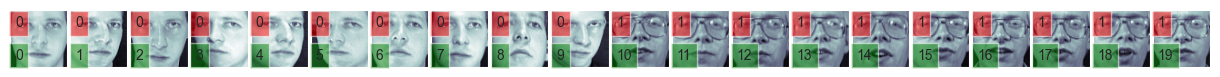

In [16]:
import matplotlib.pyplot as plt

def print_caras(imagenes, target, desde=0, hasta=0):
    # configuramos el tamaño de las imágenes por pulgadas
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(desde, hasta):
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[]) # graficar foto en matriz 20x20
        p.imshow(imagenes[i], cmap=plt.cm.bone)
        # etiquetamos las imágenes con el valor objetivo (target value)
        p.text(5, 19, str(target[i]), bbox=dict(facecolor='red', alpha=0.5))
        p.text(5, 55, str(i), bbox=dict(facecolor='green', alpha=0.5))

print_caras(faces.images, faces.target, 0, 20)

In [17]:
from sklearn.svm import SVC
svc_1 = SVC(kernel="linear", random_state=449)

In [18]:
from sklearn.model_selection import train_test_split

X = faces.data
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=449)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (300, 4096)
Test size: (100, 4096)


In [19]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluar_validacion_cruzada(clf, X, y, K):
    cv = KFold(n_splits=K, shuffle=True, random_state=449) # creamos un k-fold cross validation iterator
    scores = cross_val_score(clf, X, y, cv=cv) # por defecto el puntaje es exactitud (accuracy)
    print(scores)
    print(f"Accuracy media: {np.mean(scores):.4f} (+/- {sem(scores):.4f})")

evaluar_validacion_cruzada(svc_1, X_train, y_train, 5)

[0.95       0.98333333 0.93333333 0.9        0.93333333]
Accuracy media: 0.9400 (+/- 0.0135)


Informe de clasificación:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         4


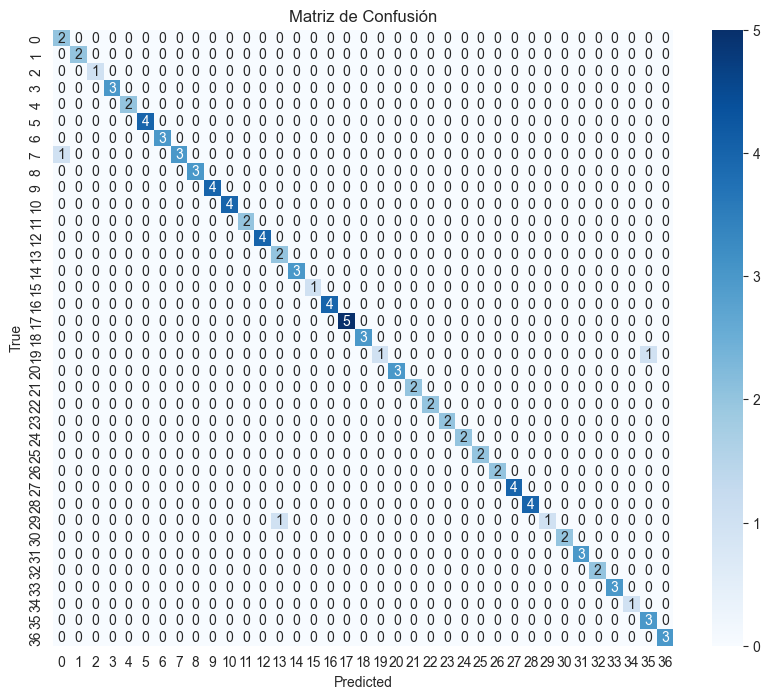

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Entrenamos el modelo
svc_1.fit(X_train, y_train)

# Predicciones
y_pred = svc_1.predict(X_test)

# Informe
print("Informe de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
